<a href="https://colab.research.google.com/github/Rlackdals981010/ai_Study/blob/master/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#주성분 분석
#군집이나 분류에 영향을 안 미치면서 사진 압축하기

In [43]:
#데이터의 속성 = 특성
##과일 사진 = 100*100 = 10000픽셀 -> 10000개 특성 즉, 특성=차원

#n차원 배열 : 배열의 축 개수 = 차원
##1차원, 즉 벡터는 원소의 개수
##2차원일때 행과 열이 차원

In [44]:
#차원 축소 : 비지도 학습 작업
##특성이 많다 -> 선형 모델의 성능이 높아지고 훈련 데이터에 과대적합된다.
##차원 축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킴
###복구도 가능

In [45]:
#대표적 차원 축소 알고리즘 : 주성분 분석 PCA
#1차원 함수 y=nx+a 형태로 데이터가 찍혀있다고 생각해라
##데이터의 분산이 가장 큰 방향 : 대각선 방향
###해당 직선이 (2,1)를 지난다고 하면 벡터를 (2,1)로 표현 할 수 있다. 이 벡터가 주성분

#주성분 벡터의 원소 개수 = 원본 데이터셋에 있는 특성 개수
##원본 데이터는 주성분을 사용해 차원을 줄일 수 있다. s(4,2) -> p(4.5)

#주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다1
##주성분은 가장 분산이 큰 반향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가진 특성을 가장 잘 나태낸다.
###첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다.
###해당 백터(수직인 벡터)가 두 번째 주성분.

In [46]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2023-12-20 10:03:50--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-20 10:03:50--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-20 10:03:51--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #주성분의 개수 지정
pca.fit(fruits_2d) #비지도는 타겟 데이터 미제공

PCA(n_components=50)

In [48]:
#pca 클래스가 찾은 주성분은 components_에 저장되어 있음.
print(pca.components_.shape)
#첫 번째 차원 : n_components=50으로 저장해서 주성분 50개
#두 번째 차원 : 원본 데이터의 특성 개수와 같은 100*100

(50, 10000)


In [49]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) #n은 샘플 개수
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

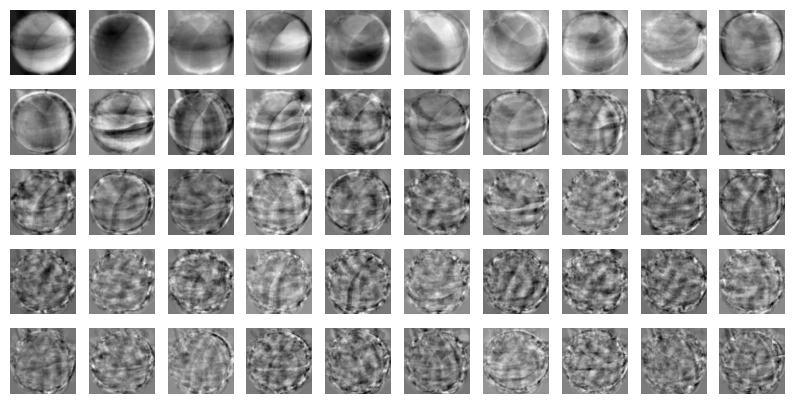

In [50]:
draw_fruits(pca.components_.reshape(-1,100,100))
#가장 분산이 큰 방향을 순서대로 나타낸 것. -> 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각 가능

In [51]:
print(fruits_2d.shape) # 10000개의 픽셀(특성)을 지닌 300개의 이미지

fruits_pca = pca.transform(fruits_2d) #50개의 주성분을 찾은 pca 모델
print(fruits_pca.shape) #50

##차원축소 종료

(300, 10000)
(300, 50)


In [52]:
#원본 데이터 재구성
##100퍼센트 복구는 불가능 하나, 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에, 원본 데이터를 상당 부분 재구성 가능하다.
fruits_inverse = pca.inverse_transform(fruits_pca)#inverse_transform가 원본 데이터를 재구성하는 메서드
print(fruits_inverse.shape)

(300, 10000)


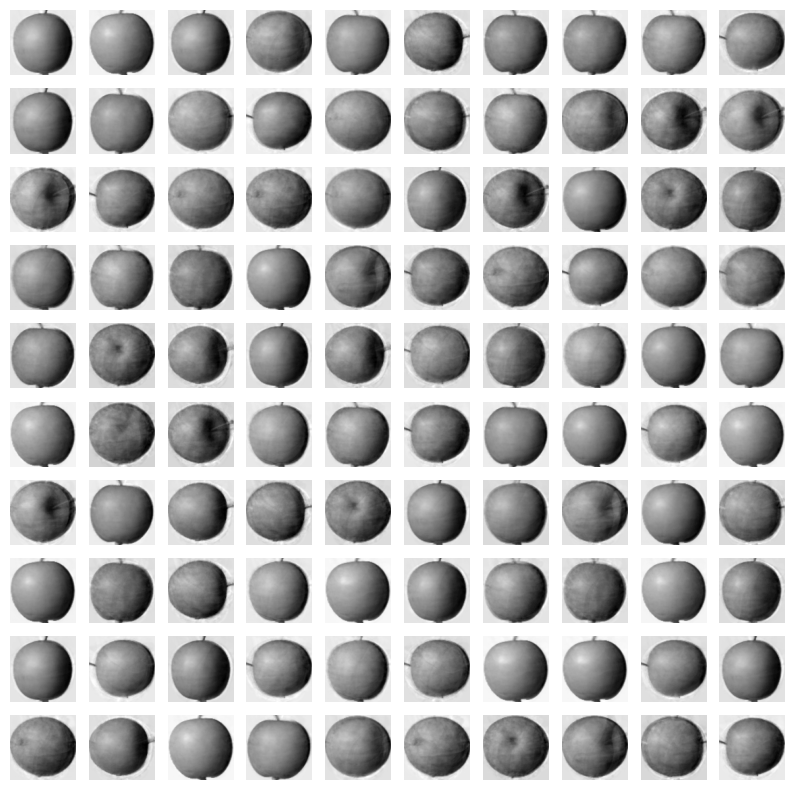

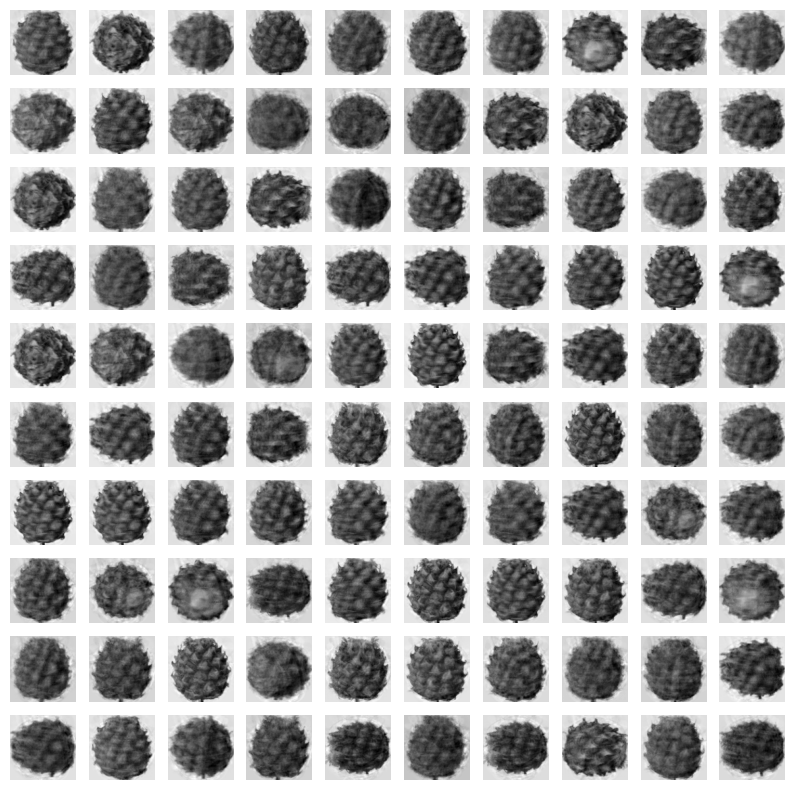

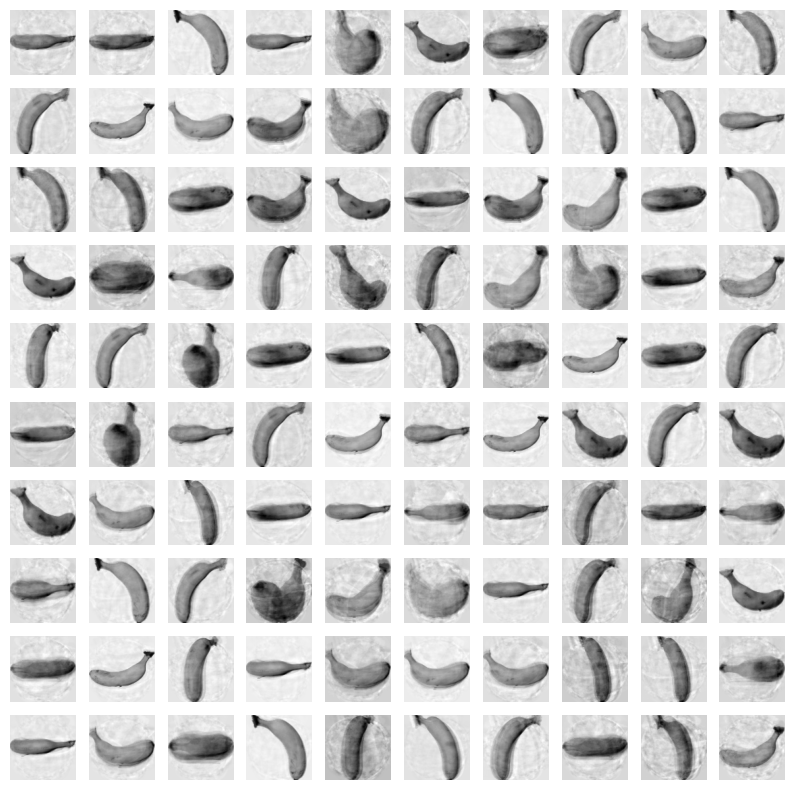

In [53]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200] :
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

0.9215658395901151


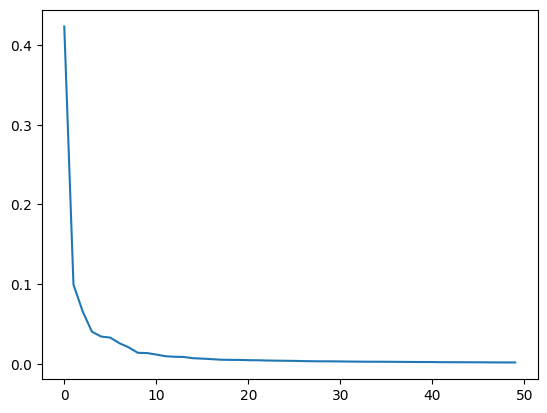

In [54]:
#주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값 : 설명된 분산
##PCA 클래스의 explained_varinace_ratio_에 각 주성분의 설명된 분산 비율이 기록
###분산 비율을 모두 더하면 주성분의 총 개수로 표현하는 총 분산 비율을 얻을 수 있따.
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

#처음 10개의 주성분이 대부분의 분산 표현

In [55]:
#다른 알고리즘과 사용하기
#1. 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#지도학습 - 데이터와 타겟 필요
##타겟 : 사과, 파인애플, 바나나 [0~2]
target = np.array([0]*100+[1]*100+[2]*100)

from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))#교차검증점수
print(np.mean(scores['fit_time']))#교차검증폴드의 훈련시간

scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#정확도 100%에 운련시간 대폭 감소

pca = PCA(n_components=0.5) #원하는 설명된 분산의 비율 0~1사이 입력 0.5면 50퍼
pca.fit(fruits_2d)
print(pca.n_components_) #이 결과개의 특성으로 원본 데이터에 있는 분산의 n_components만큼 표현 가능

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #print(pca.n_components_)로 확인한 특성의 개수로 원본 데이터를 반환했기 때문에 (300,2)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
3.614404582977295
1.0
0.061167144775390626
2
(300, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.06497244834899903


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


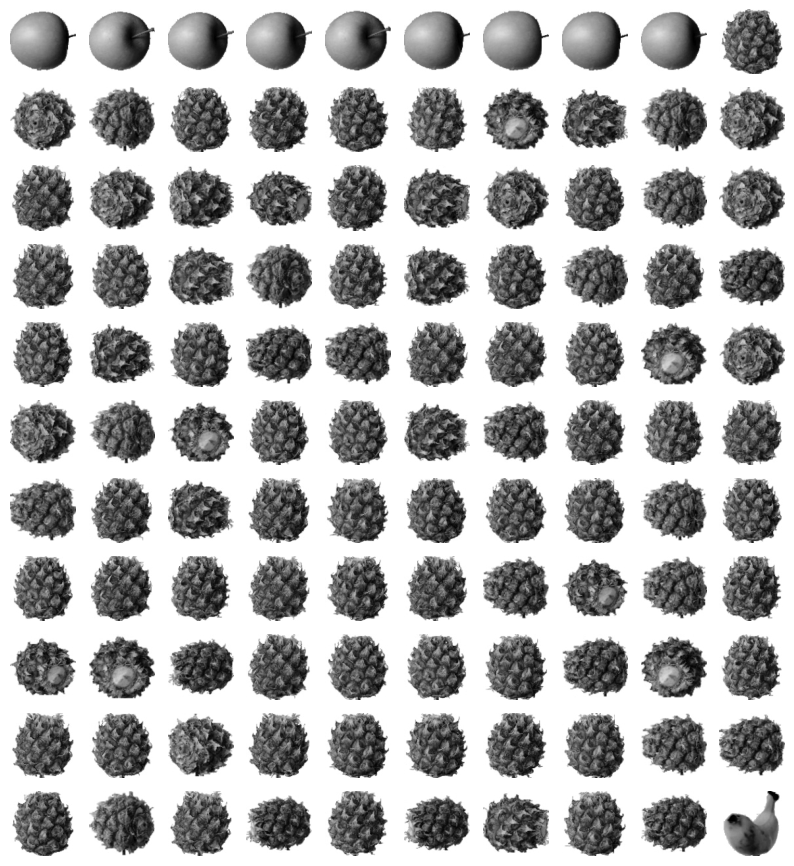

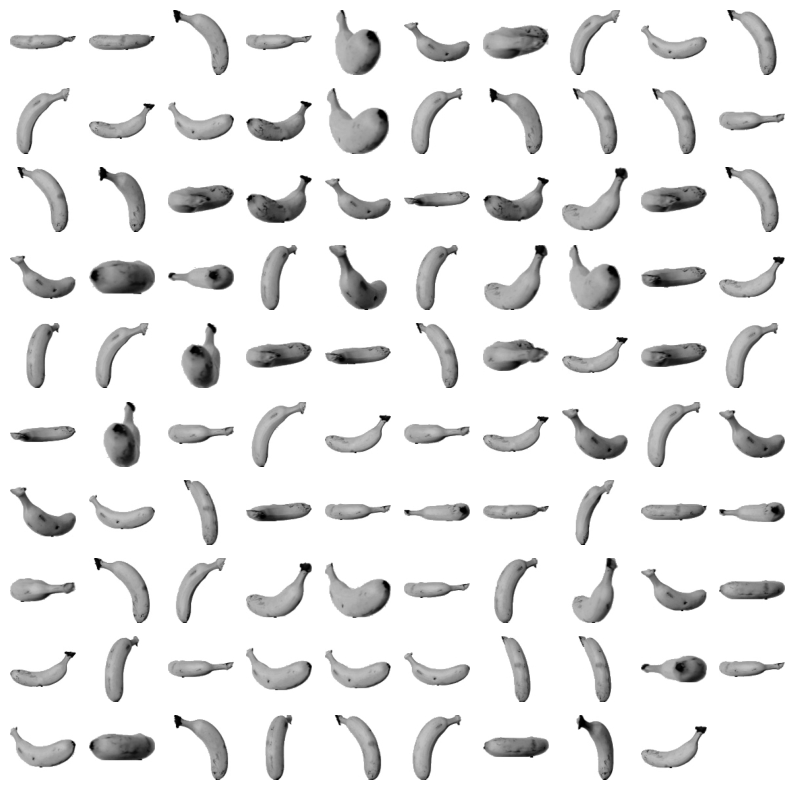

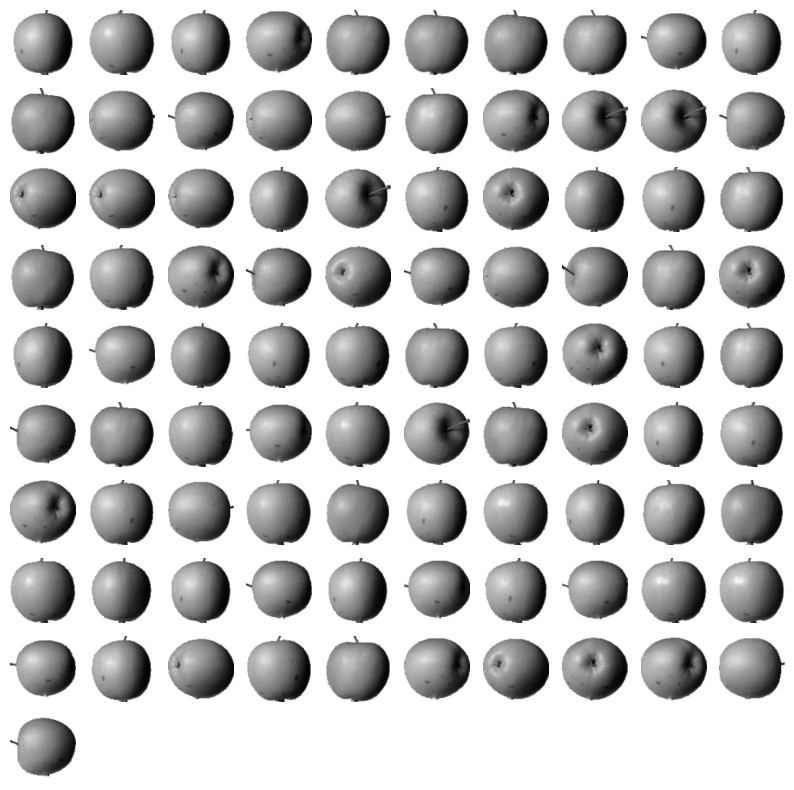

In [56]:
#차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))
#각 클러스터는 110, 99, 91개 샘플 포함
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")
#과일들이 좀 섞여있다.

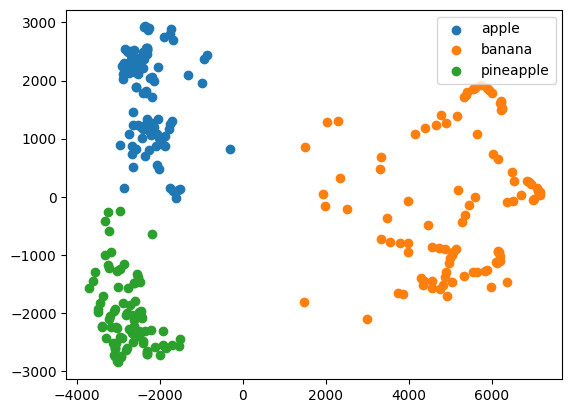

In [58]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

#사과랑 파인애플의 경계가 가깝다 -> 혼동 발생 가능